In [0]:
import numpy as np
from keras.preprocessing import image
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model
from keras.utils import np_utils

In [0]:
batch_size = 128
epochs = 10
number_classes = 10

In [0]:
(x_train,y_train), (x_test,y_test)  = mnist.load_data()

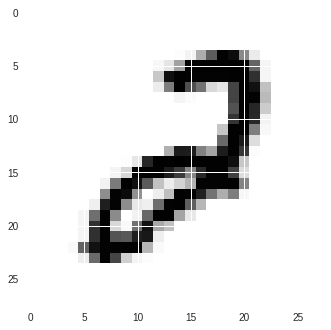

2


In [43]:
plt.imshow(x_train[555].reshape(28,28))
plt.show()
print(y_train[555])

In [44]:
x_train = x_train.reshape((60000,28,28,1))
x_test = x_test.reshape((10000,28,28,1))
print(x_train.shape,x_test.shape)
y_train = to_categorical(y_train,number_classes)
y_test = to_categorical(y_test,number_classes)
print(y_train.shape,y_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000, 10) (10000, 10)


In [0]:
datagen = image.ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode='nearest',
    zoom_range=0.3
)

In [46]:
temp_x = np.copy(x_train)
temp_y = np.copy(y_train)
datagen.fit(temp_x)
for i in range(5):
  data_iter = datagen.flow(temp_x, temp_y, batch_size=60000)
  x_batch, y_batch = data_iter.next()
  x_train = np.concatenate([x_train,x_batch[:50000]])
  y_train = np.concatenate([y_train,y_batch[:50000]])
  x_test = np.concatenate([x_test,x_batch[50000:]])
  y_test = np.concatenate([y_test,y_batch[50000:]])
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(310000, 28, 28, 1) (310000, 10)
(60000, 28, 28, 1) (60000, 10)


In [47]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(310000, 28, 28, 1) (310000, 10)
(60000, 28, 28, 1) (60000, 10)


In [0]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='valid', input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))

In [0]:
#损失函数用分类交叉熵
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [50]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.1)

Train on 279000 samples, validate on 31000 samples
Epoch 1/10
279000/279000 [==============================] - 27s 96us/step - loss: 0.6617 - acc: 0.7835 - val_loss: 0.3142 - val_acc: 0.8997
Epoch 2/10
279000/279000 [==============================] - 26s 93us/step - loss: 0.3144 - acc: 0.8995 - val_loss: 0.2572 - val_acc: 0.9174
Epoch 3/10
279000/279000 [==============================] - 26s 93us/step - loss: 0.2584 - acc: 0.9170 - val_loss: 0.2238 - val_acc: 0.9278
Epoch 4/10
279000/279000 [==============================] - 26s 93us/step - loss: 0.2314 - acc: 0.9265 - val_loss: 0.1923 - val_acc: 0.9389
Epoch 5/10
279000/279000 [==============================] - 26s 93us/step - loss: 0.2147 - acc: 0.9312 - val_loss: 0.1790 - val_acc: 0.9431
Epoch 6/10
279000/279000 [==============================] - 26s 93us/step - loss: 0.2046 - acc: 0.9352 - val_loss: 0.1708 - val_acc: 0.9456
Epoch 7/10
279000/279000 [==============================] - 26s 93us/step - loss: 0.1978 - acc: 0.9370 - val_

In [0]:
answer = model.evaluate(x_test, y_test, verbose=0)

In [52]:
print(answer)

[0.13189900535068785, 0.9583833333333334]


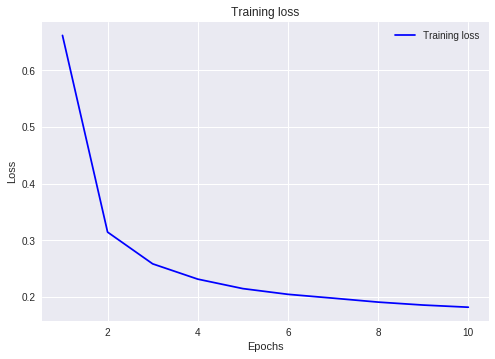

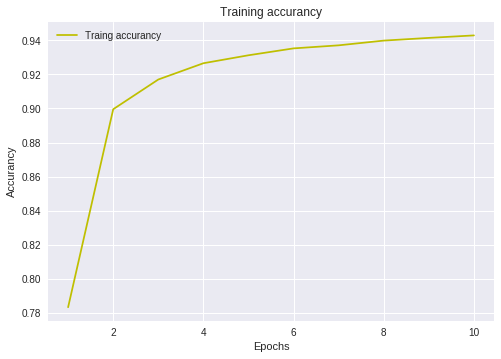

In [53]:
history_dict = history.history 
loss_values = history_dict['loss']  
epochs = range(1, len(loss_values) + 1) 
plt.plot(epochs, loss_values, 'b', label='Training loss')   
plt.title('Training loss')
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show()
plt.clf()
acc = history_dict['acc']
plt.plot(epochs, acc, 'y', label='Traing accurancy')  
plt.title('Training accurancy')
plt.xlabel('Epochs') 
plt.ylabel('Accurancy') 
plt.legend() 
plt.show()

In [54]:
!pip install tensorflowjs

In [0]:


model.save('keras.h5')



In [58]:
!rm -rf model
!mkdir model
!tensorflowjs_converter --input_format keras keras.h5 model/

Using TensorFlow backend.


In [59]:


!zip -r model.zip model



  adding: model/ (stored 0%)
  adding: model/model.json (deflated 82%)
  adding: model/group1-shard1of1 (deflated 7%)
